# Q1

In [1]:
from library.nonlinear_equations import solve_regula_falsi, solve_bisection, solve_newton_raphson, laguerre_solve

from math import log, cos, sin
def f(x): return log(x/2) - sin(5*x/2)

In [2]:
ans = solve_bisection(f, guess=[1.5, 2.5], delta=1e-6, verbose = False)
print(f"Solution by bisection method: {ans}")

Solution by bisection method: 1.401929


In [3]:
ans = solve_regula_falsi(f, guess=[1.5, 2.5], delta=1e-6, verbose = False)
print(f"Solution by regula falsi method: {ans}")

Solution by regula falsi method: 1.401929


## Summary

 - I have got the following data from the above 2 functions. If we put `verbose=True` as an argument, they print the statistics in every iteration. But for presenting purpose, I ran the cell with `verbose=True`, copied the data into this table and changed `verbose` back to `False`.
 - In some cells in bisection, we can see, the value does not change for some iteratons. This is because, I am always printing the smaller value. For those iterations, the larger value was reducing to some value which was still larger the other. Thus the smaller value remained the smaller one over those iterations.
 - For Bisection and Regula Falsi, we have two pointers (a and b) while listing in this table, for each of a and b, I have listed the value if f(value) is smaller. i.e: `print(a if abs(f(a))<abs(f(b)) else b)`

| Step |  Bisection  | Regula Falsi |
|:----:|:-----------:|:------------:|
|   1  |  1.311000   |   1.311000   |
|   2  |  1.311000   |   1.423389   |
|   3  |  1.447125   |   1.402678   |
|   4  |  1.379062   |   1.401954   |
|   5  |  1.413093   |   1.401930   |
|   6  |  1.396078   |   1.401929   |
|   7  |  1.404585   |       -      |
|   8  |  1.400332   |       -      |
|   9  |  1.402458   |       -      |
|  10  |  1.402458   |       -      |
|  11  |  1.401927   |       -      |
|  12  |  1.401927   |       -      |
|  13  |  1.401927   |       -      |
|  14  |  1.401927   |       -      |
|  15  |  1.401927   |       -      |
|  16  |  1.401927   |       -      |
|  17  |  1.401927   |       -      |
|  18  |  1.401931   |       -      |
|  19  |  1.401929   |       -      |
|  20  |  1.401930   |       -      |
|  21  |  1.401929   |       -      |

# Q2

In [4]:
from library.nonlinear_equations import get_brackets

def f(x): return -(cos(x) + x)
def fd(x): return sin(x) - 1

In [5]:
ans = solve_bisection(f, guess=None, delta=1e-6, verbose = False)
print(f"Solution by bisection method: {ans}")

Solution by bisection method: -0.739085


In [6]:
ans = solve_regula_falsi(f, guess=None, delta=1e-6, verbose = False)
print(f"Solution by regula falsi method: {ans}")

Solution by regula falsi method: -0.739085


In [7]:
ans = solve_newton_raphson(f, fd, guess=None, delta=1e-6, verbose = False)
print(f"Solution by newton rhapson method: {ans}")

Solution by newton rhapson method: -0.739085


## Summary:


| Step |  Bisection  | Regula Falsi | Newton Rhapson |
|:----:|:-----------:|:------------:|:--------------:|
|   1  |  -0.036468  |   -0.814114  |   -16.053801   |
|   2  |  -1.182327  |   -0.723117  |   9.656049     |
|   3  |  -0.609397  |   -0.738828  |   2.592457     |
|   4  |  -0.609397  |   -0.739081  |   -1.046239    |
|   5  |  -0.752630  |   -0.739085  |   -0.753880    |
|   6  |  -0.752630  |       -      |   -0.739132    |
|   7  |  -0.752630  |       -      |   -0.739085    |
|   8  |  -0.734726  |       -      |       -        |
|   9  |  -0.734726  |       -      |       -        |
|  10  |  -0.739202  |       -      |       -        |
|  11  |  -0.739202  |       -      |       -        |
|  12  |  -0.739202  |       -      |       -        |
|  13  |  -0.739202  |       -      |       -        |
|  14  |  -0.739202  |       -      |       -        |
|  15  |  -0.739062  |       -      |       -        |
|  16  |  -0.739062  |       -      |       -        |
|  17  |  -0.739097  |       -      |       -        |
|  18  |  -0.739079  |       -      |       -        |
|  19  |  -0.739088  |       -      |       -        |
|  20  |  -0.739084  |       -      |       -        |
|  21  |  -0.739084  |       -      |       -        |
|  22  |  -0.739085  |       -      |       -        |

# Q3:

In [8]:
coeff = [1, 0, -5, 0, 4]  # x^4 - 5x^2 + 4
roots = laguerre_solve(coeff, epsilon=1e-6)
print(roots)

a = |1.000000  |
    |-0.999999|
    |1.999999  |
    |-2.000000|



# Q4:

In [9]:
from library.fitting import polynomial_fit
from library.matrix import Matrix

In [10]:
x, y = [], []
with open("data/assign4fit.txt") as f:
    points = f.readlines()
    for point in points:
        xs, ys = point.split("\t")
        x.append([float(xs)])
        y.append([float(ys)])
    x = Matrix(x, "x", 2)
    y = Matrix(y, "y", 3)

In [11]:
a = polynomial_fit(x, y, 4)
for i in range(len(a)):
    print(f"a{i} = {a.mat[i][0]}")

a0 = 0.5746586674194764
a1 = 4.725861442143591
a2 = -11.128217777647283
a3 = 7.668677622912027


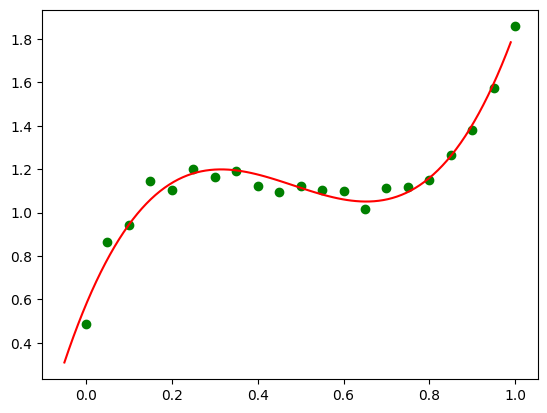

In [12]:
from library.nonlinear_equations import P
from library.matrix import linspace
import matplotlib.pyplot as plt

plot_x = linspace(-0.05, 1, 100)
plot_y = [P(i, a.T().mat[0][::-1]) for i in  plot_x]

plt.scatter(x.mat, y.mat, c="g")
plt.plot(plot_x, plot_y, "r")